

# Project: Children, Woman, Life and Income

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I am using is Gapminder from http://www.gapminder.org/data/. I chose four features, which are children per woman, child mortality between zero and five year old, life expectancy and income. In order to be consistent, I use data from year 1800 to year 2018. What I am interested to see is the trend for these features during the past few centuries. And whether child mortality is related to the other three features. 


In [1]:
# import packages for future use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

<a id='wrangling'></a>
## Data Wrangling



### 1. Load and reshape four datasets

In [2]:
df_chd = pd.read_csv('children_per_woman_total_fertility.csv')
df_chd

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,5.63,5.63,5.64,5.64,5.64,5.65,5.65,5.65,5.66,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
180,Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.89,1.89,1.89,1.89,1.89,1.89,1.89,1.89,1.89,1.89
181,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70
182,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,2.59,2.57,2.56,2.54,2.53,2.51,2.50,2.48,2.46,2.46


First, we need to reshape this dataset. 
<br/> Step 1. I am just interested in the year from 1800 to 2018, so I will remove columns after year 2018. 
<br/> Step 2. Reshape. And add new column year and children_per_woman

In [3]:
# remove columns after year 2018
df_chd = df_chd.iloc[:,0:220]
df_chd.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [4]:
# get the column names except "country"
names = df_chd.iloc[: , df_chd.columns != 'country'].columns

In [5]:
# reshape the dataset 
df_chd = pd.melt(df_chd,id_vars=['country'], value_vars=names, var_name = 'year', value_name = 'children_per_woman')
df_chd

,country,year,children_per_woman
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00
...,...,...,...
40291,Venezuela,2018,2.27
40292,Vietnam,2018,1.95
40293,Yemen,2018,3.79
40294,Zambia,2018,4.87


In [6]:
# import another dataset
df_mot = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_mot.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


In [7]:
# remove columns after year 2018
df_mot = df_mot.iloc[: , 0:220]
df_mot.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,91.90,88.00,84.10,80.50,77.00,73.50,70.40,67.50,64.70,62.30
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,14.40,13.30,12.30,11.40,10.70,10.10,9.60,9.27,9.02,8.82
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.30,27.40,26.70,26.10,25.70,25.30,24.90,24.50,24.00,23.50
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.39,4.18,3.98,3.79,3.61,3.43,3.27,3.14,3.01,2.89
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,129.00,120.00,113.00,105.00,98.40,92.90,88.10,84.00,80.40,77.20


In [8]:
# reshape the dataset
df_mot = pd.melt(df_mot, id_vars = ['country'], value_vars = names, var_name = 'year', value_name = 'child_mortality')
df_mot

,country,year,child_mortality
0,Afghanistan,1800,469.0
1,Albania,1800,375.0
2,Algeria,1800,460.0
3,Andorra,1800,NaN
4,Angola,1800,486.0
...,...,...,...
42700,Venezuela,2018,24.5
42701,Vietnam,2018,20.7
42702,Yemen,2018,55.0
42703,Zambia,2018,57.8


In [9]:
# import the third dataset 
df_life = pd.read_csv('life_expectancy_years.csv')
df_life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [10]:
# remove columns after 2018
df_life = df_life.iloc[: , 0:220]

In [11]:
df_life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,59.3,59.9,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.5,77.6,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.1,76.3,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.2,82.3,82.4,82.4,82.5,82.5,82.6,82.7,82.7,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.1,59.9,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6


In [12]:
# reshape the dataset
df_life = pd.melt(df_life, id_vars =['country'], value_vars = names, var_name = 'year', value_name = 'life_expect' )
df_life

,country,year,life_expect
0,Afghanistan,1800,28.2
1,Albania,1800,35.4
2,Algeria,1800,28.8
3,Andorra,1800,NaN
4,Angola,1800,27.0
...,...,...,...
40948,Venezuela,2018,75.2
40949,Vietnam,2018,74.6
40950,Yemen,2018,68.1
40951,Zambia,2018,63.7


In [13]:
# import the fourth dataset
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [14]:
# remove columns after year 2018
df_income = df_income.iloc[ : , 0:220]

In [15]:
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1500,1670,1630,1770,1810,1800,1770,1760,1760,1740
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11800,12300
2,Algeria,715,716,717,718,719,720,721,722,723,...,12700,12900,13000,13200,13300,13500,13800,13900,13900,13900
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,6290,6360,6350,6650,6730,6810,6650,6260,6050,5730


In [16]:
# reshape the dataset
df_income = pd.melt(df_income, id_vars = ['country'], value_vars = names, var_name = 'year', value_name = 'income')
df_income

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
42262,Venezuela,2018,12500
42263,Vietnam,2018,6610
42264,Yemen,2018,2360
42265,Zambia,2018,3740


### 2. Join the datasets into one

In [18]:
# join these four datasets together

df = pd.merge(df_chd, df_mot, how = 'inner', on =
              ['country','year']).merge(df_life, on =
                                        ['country', 'year']).merge(df_income, on = ['country','year'])

In [19]:
# import geography dataset
df_geo = pd.read_csv('Geography.csv')

In [20]:
df_geo.head()

,name,four_regions,eight_regions,six_regions,"World bank, 4 income groups 2017"
0,Afghanistan,asia,asia_west,south_asia,Low income
1,Albania,europe,europe_east,europe_central_asia,Upper middle income
2,Algeria,africa,africa_north,middle_east_north_africa,Upper middle income
3,Andorra,europe,europe_west,europe_central_asia,High income
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,Lower middle income


In [21]:
df_geo = df_geo.rename(columns={'name':'country'})

#### Combine Geography dataset with the features dataset 

In [22]:
df = pd.merge(df, df_geo, how='inner', on ='country')

In [23]:
df.head()

,country,year,children_per_woman,child_mortality,life_expect,income,four_regions,eight_regions,six_regions,"World bank, 4 income groups 2017"
0,Afghanistan,1800,7.0,469.0,28.2,603,asia,asia_west,south_asia,Low income
1,Afghanistan,1801,7.0,469.0,28.2,603,asia,asia_west,south_asia,Low income
2,Afghanistan,1802,7.0,469.0,28.2,603,asia,asia_west,south_asia,Low income
3,Afghanistan,1803,7.0,469.0,28.2,603,asia,asia_west,south_asia,Low income
4,Afghanistan,1804,7.0,469.0,28.2,603,asia,asia_west,south_asia,Low income


### 3. General properties of the new dataset


In [24]:
df.shape

(40077, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40077 entries, 0 to 40076
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           40077 non-null  object 
 1   year                              40077 non-null  object 
 2   children_per_woman                40077 non-null  float64
 3   child_mortality                   40077 non-null  float64
 4   life_expect                       40077 non-null  float64
 5   income                            40077 non-null  int64  
 6   four_regions                      40077 non-null  object 
 7   eight_regions                     40077 non-null  object 
 8   six_regions                       40077 non-null  object 
 9   World bank, 4 income groups 2017  40077 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.4+ MB


In [26]:
# change year data type to int
df=df.astype({"year":int})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40077 entries, 0 to 40076
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           40077 non-null  object 
 1   year                              40077 non-null  int64  
 2   children_per_woman                40077 non-null  float64
 3   child_mortality                   40077 non-null  float64
 4   life_expect                       40077 non-null  float64
 5   income                            40077 non-null  int64  
 6   four_regions                      40077 non-null  object 
 7   eight_regions                     40077 non-null  object 
 8   six_regions                       40077 non-null  object 
 9   World bank, 4 income groups 2017  40077 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.4+ MB


In [28]:
df.describe()

,year,children_per_woman,child_mortality,life_expect,income
count,40077.000000,40077.000000,40077.000000,40077.000000,40077.000000
mean,1909.000000,5.404948,290.885494,43.027364,4674.491030
std,63.219984,1.634566,161.311199,16.302878,10368.911267
min,1800.000000,1.120000,1.700000,1.010000,245.000000
25%,1854.000000,4.600000,140.000000,31.100000,855.000000
50%,1909.000000,5.950000,358.000000,35.400000,1520.000000
75%,1964.000000,6.630000,420.000000,55.600000,3580.000000
max,2018.000000,8.870000,756.000000,85.000000,179000.000000


Since we use inner join, we can see that there is no missing value for each variable. And from the statistic metrix, we can't see the unreasonable values. So the data cleaning process is done. We can do the exploratory data analysis step.

<a id='eda'></a>
## Exploratory Data Analysis

First, let's visualize the single variable to get some general information before answering any questions.

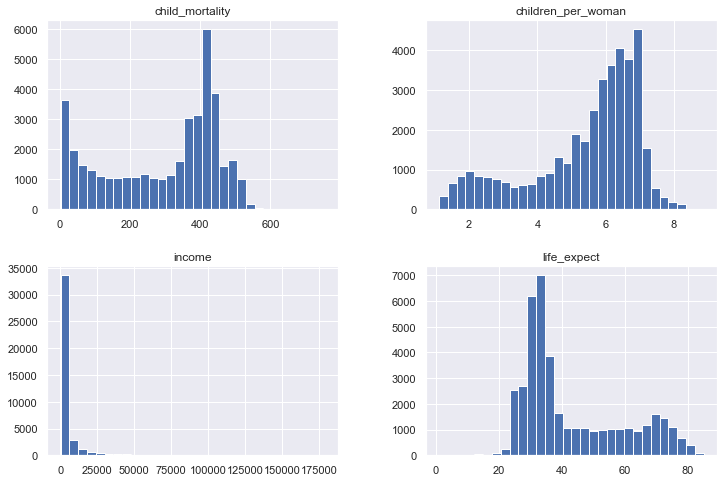

In [29]:
df.hist(column = ['child_mortality','children_per_woman','life_expect','income'], bins = 30, figsize=(12,8));

From the single variable visualization, we get a better understanding about the range that most of variables fall into. Next, we will explore our data by answering some intersting questions.

### Q1. What is the women fertility rate during the past few centuries?

In [30]:
df_year_sum = df.groupby('year').sum()
df_year_avg = df.groupby('year').mean()

In [32]:
df_year_sum.head()

,children_per_woman,child_mortality,life_expect,income
year,,,,
1800,1118.47,77719.0,5760.4,179141
1801,1117.91,77604.0,5752.9,179213
1802,1118.53,77485.0,5756.0,179545
1803,1118.35,77410.0,5738.4,179573
1804,1118.42,77340.0,5752.4,179754


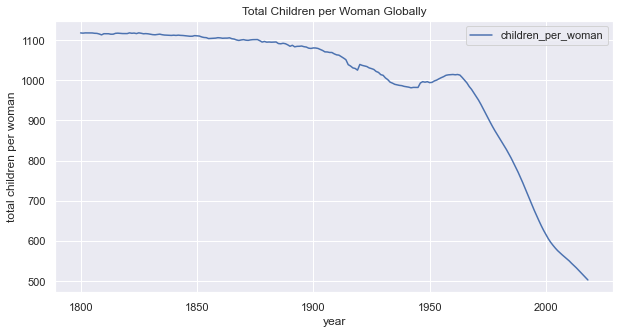

In [33]:
df_year_sum.reset_index().plot(x = 'year',y = 'children_per_woman', kind = 'line', figsize = (10,5))
plt.title('Total Children per Woman Globally')
plt.ylabel('total children per woman');


Overall, total children women gave birth from year 1800 to 2018 decreased. From 1945 to 1955, the trend is reverse. It had a slightly increase during those 10 years.

### Q2. What is the children mortality rate during the past few centuries?

In [34]:
# create a line plot function
df_index = df_year_avg.reset_index()
def line_plot(t):
    df_index.plot(x='year', y = t, kind = 'line', figsize=(10,5))
    plt.ylabel(t)

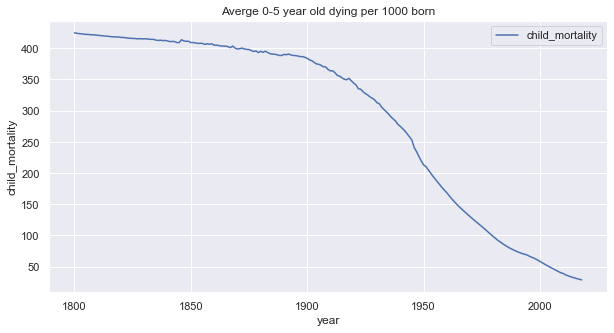

In [35]:
line_plot('child_mortality')
plt.title('Averge 0-5 year old dying per 1000 born');


From 1800 to 2018, 0-5 year old child dying per 1000 born decreases significantly, especially after World War II, it decreased drastically.

### Q3. What is the life expectancy for the past few centuries?

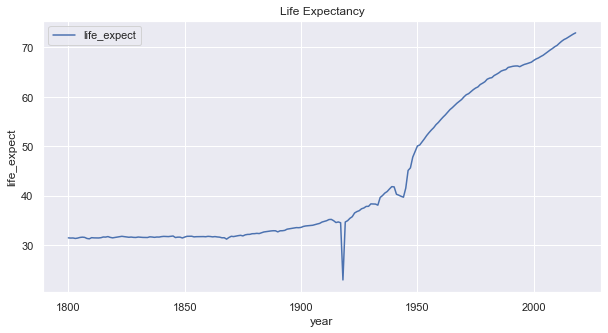

In [36]:
# get the average life expectancy for all the countries 
line_plot('life_expect')
plt.title('Life Expectancy');


In [37]:
# locate rows with minimun life expectancy 

df_index.loc[df_index['life_expect'] == df_index['life_expect'].min()]

,year,children_per_woman,child_mortality,life_expect,income
118,1918,5.627158,351.77377,22.964645,2100.535519


From year 1800 ot 1918, the life expectancy for people worldwide increased slowly. However, in 1918, because of the pandemic, the average life expectancy worldwide dropped to 23. During World War II, the average age of people's life is slightly decreased, after 1950, it increased significantly until now.  

### Q4. What is income for the past few centuries?

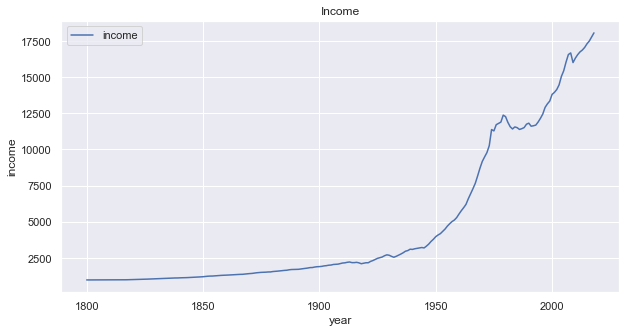

In [38]:
line_plot('income')
plt.title('Income');

### Q5. Total child per woman vs. children motality rate

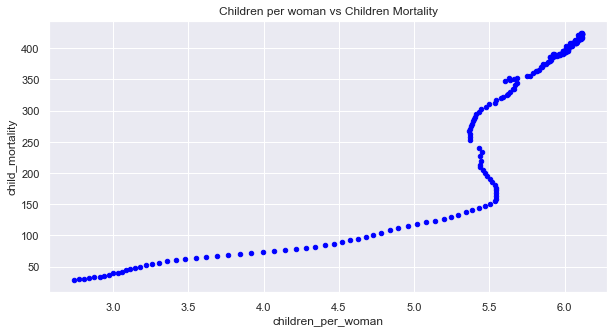

In [39]:
df_index.plot(x='children_per_woman', y='child_mortality', kind ='scatter',figsize=(10,5),c ='blue')
plt.ylabel('child_mortality')
plt.title('Children per woman vs Children Mortality');

When a woman has less than 5 children, the child mortality rate is positive with children per woman. However, when a woman has more than 5 children, the relationship between these two variables is not obvious. I am curious if this relationship is same during each century. I will divide the data into three centuries, 19, 20 and 21 century, and compare to the same variables again.

In [40]:
# select rows in 19 centuries
df_1800 = df_index.loc[df['year'] < 1900]

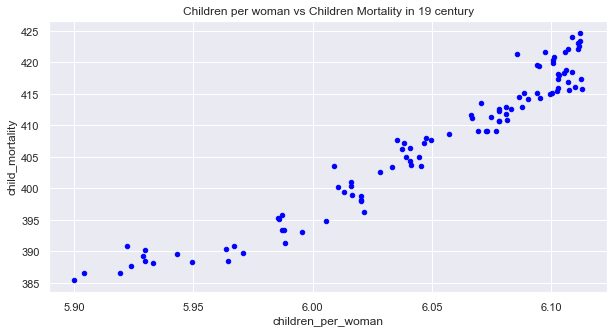

In [41]:
df_1800.plot.scatter(x='children_per_woman', y='child_mortality', figsize=(10,5),c ='blue')
plt.ylabel('child_mortality')
plt.title('Children per woman vs Children Mortality in 19 century');

In [42]:
# select rows in 20 century
df_1900 = df_index.loc[(df['year'] > 1899) & (df['year'] < 2000)]

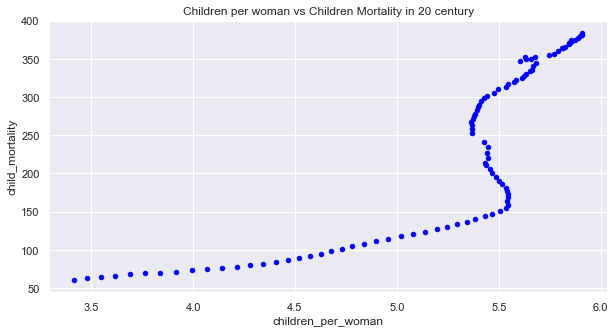

In [43]:
df_1900.plot.scatter(x='children_per_woman', y='child_mortality',c='blue', figsize=(10,5))
plt.ylabel('child_mortality')
plt.title('Children per woman vs Children Mortality in 20 century');

In [44]:
# select rows in 21 century
df_2000 = df_index.loc[(df['year'] >= 2000)]

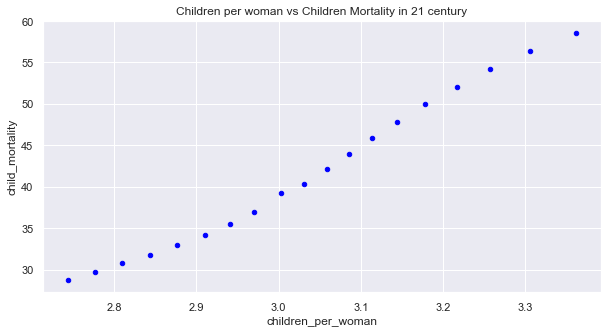

In [45]:
df_2000.plot.scatter(x='children_per_woman', y='child_mortality', c = 'blue', figsize=(10,5))
plt.ylabel('child_mortality')
plt.title('Children per woman vs Children Mortality in 21 century');

From the above three different centuries, we can see children per woman is only positive related with child mortality in 21 century. In 19 century, it is positive most of the time although there are some exceptions.

### Q6. Income and Life Expectancy vs. Child Mortality

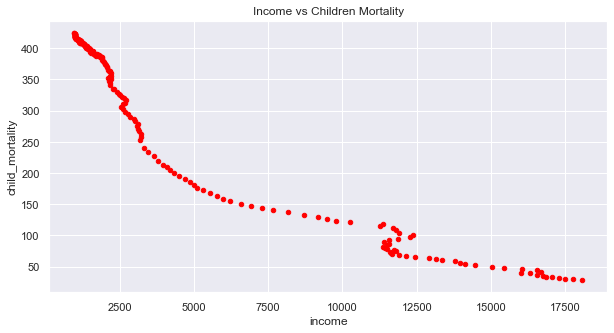

In [46]:
df_index.plot.scatter(x='income', y='child_mortality', c = 'red', figsize=(10,5))
plt.ylabel('child_mortality')
plt.title('Income vs Children Mortality');

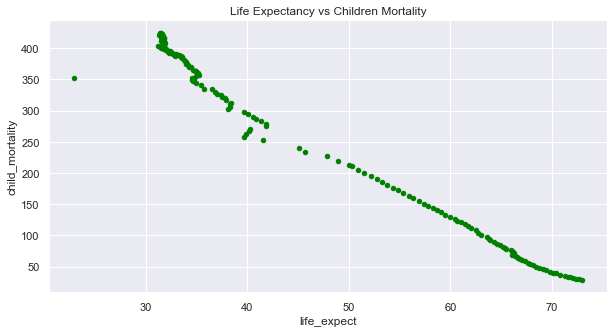

In [47]:
df_index.plot.scatter(x='life_expect', y='child_mortality', c='green', figsize=(10,5))
plt.ylabel('child_mortality')
plt.title('Life Expectancy vs Children Mortality');

As we can see, life expectancy and income are both negatively related to child mortality. 

### Q7. Does certain region have different patterns for the above features?

In [48]:
df_region_sum = df.groupby(['four_regions', 'year']).sum()
df_region_avg = df.groupby(['four_regions', 'year']).mean()

In [49]:
df_reset = df_region_avg.reset_index()

In [51]:
df_reset

,four_regions,year,children_per_woman,child_mortality,life_expect,income
0,africa,1800,6.397778,439.092593,30.525926,651.722222
1,africa,1801,6.397778,438.981481,30.400000,651.888889
2,africa,1802,6.397593,438.870370,30.400000,652.129630
3,africa,1803,6.397593,438.777778,30.525926,652.092593
4,africa,1804,6.397778,438.666667,30.525926,652.296296
...,...,...,...,...,...,...
871,europe,2014,1.623256,6.250465,78.309302,30001.627907
872,europe,2015,1.623256,6.010465,78.318605,30824.418605
873,europe,2016,1.622791,5.790000,78.509302,31440.697674
874,europe,2017,1.626279,5.580233,78.648837,32285.813953


In [52]:
# create a function to plot
def plot_region(z):
    ax = plt.subplots(figsize=(12,5))
    ax = sns.lineplot(x='year', y = z, hue = 'four_regions', data = df_reset)
    ax.set_xticks(np.arange(1800, 2020,20));

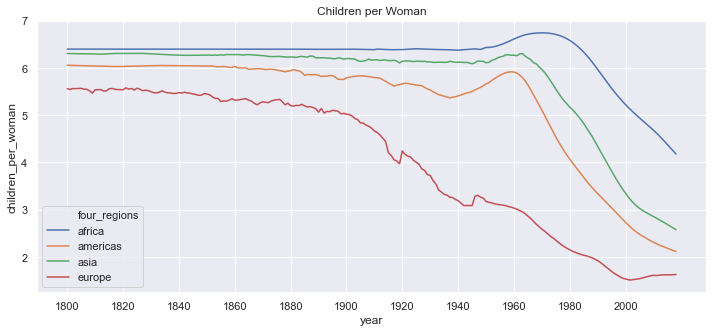

In [54]:
plot_region('children_per_woman')
plt.title('Children per Woman');

We can see that European women have few children than women from other regions.Especially after 1900, the differences became larger, until after 1950, the differences is smaller. 

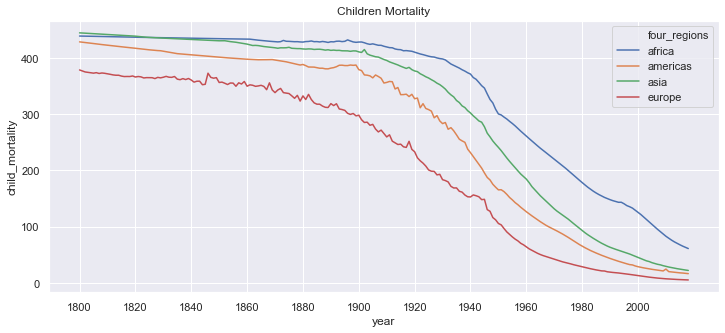

In [55]:
plot_region('child_mortality')
plt.title('Children Mortality');

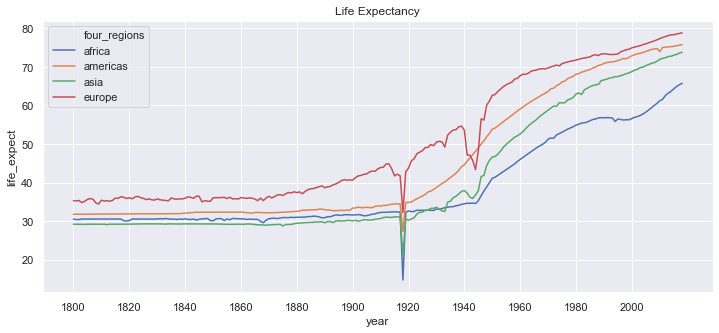

In [56]:
plot_region('life_expect')
plt.title('Life Expectancy');

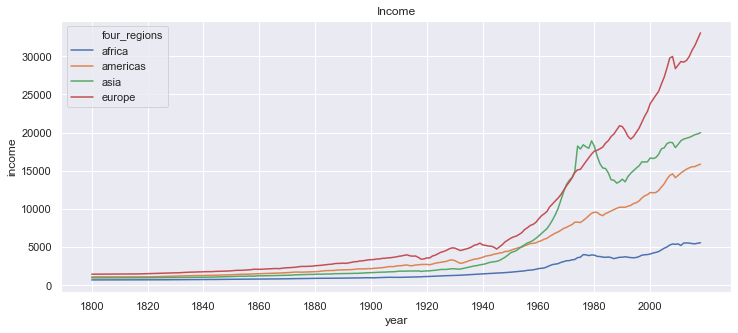

In [57]:
plot_region('income')
plt.title('Income');

From the above visualization, we can see that European have lower children per woman and child mortality, on the contrary, they have higher income and life expectancy throughout the last two centuries, expecially after year 1920, although Asian performed a little better during year 1970 to 1980. 

<a id='conclusions'></a>
## Conclusions

Based on the above data analysis, we can see that children per woman and child mortality are decreasing during the past two centuries, in the meanwhile, life expectancy and income are increasing. Europe performed better than other regions in these four features most of the time, although there is a few years different pattern for life expectancy and income. Unfortunately, the life expectancy and income are from people in overall, not just women's, so it may have bias when analyzing these features.